In [1]:
# IMPORT LIABRARIES

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot

In [3]:
#IMPORT DATASET

In [4]:
cars=pd.read_csv("D:/DATA SCIENCE/1. Data Scientist/Day 14-Multi Linear Regression  Material/Cars.csv")

In [5]:
# APPLY BASIC FUNCTIONS TO CHECK DATASET

In [6]:
cars.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [7]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HP      81 non-null     int64  
 1   MPG     81 non-null     float64
 2   VOL     81 non-null     int64  
 3   SP      81 non-null     float64
 4   WT      81 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 3.3 KB


In [8]:
cars.isna().sum()
#check missing value

HP     0
MPG    0
VOL    0
SP     0
WT     0
dtype: int64

In [9]:
# CORRELATION MATRIX
#The stronger the correlation, the more difficult it is to change one variable without changing another. It becomes difficult for the model to estimate the relationship between each independent variable and the dependent variable independently because the independent variables tend to change in unison.

In [10]:
cars.corr()

,HP,MPG,VOL,SP,WT
HP,1.000000,-0.725038,0.077459,0.973848,0.076513
MPG,-0.725038,1.000000,-0.529057,-0.687125,-0.526759
VOL,0.077459,-0.529057,1.000000,0.102170,0.999203
SP,0.973848,-0.687125,0.102170,1.000000,0.102439
WT,0.076513,-0.526759,0.999203,0.102439,1.000000


In [11]:
# SCATTER PLOT BETWEEN VARIABLES ALONG WITH HISTOGRAM

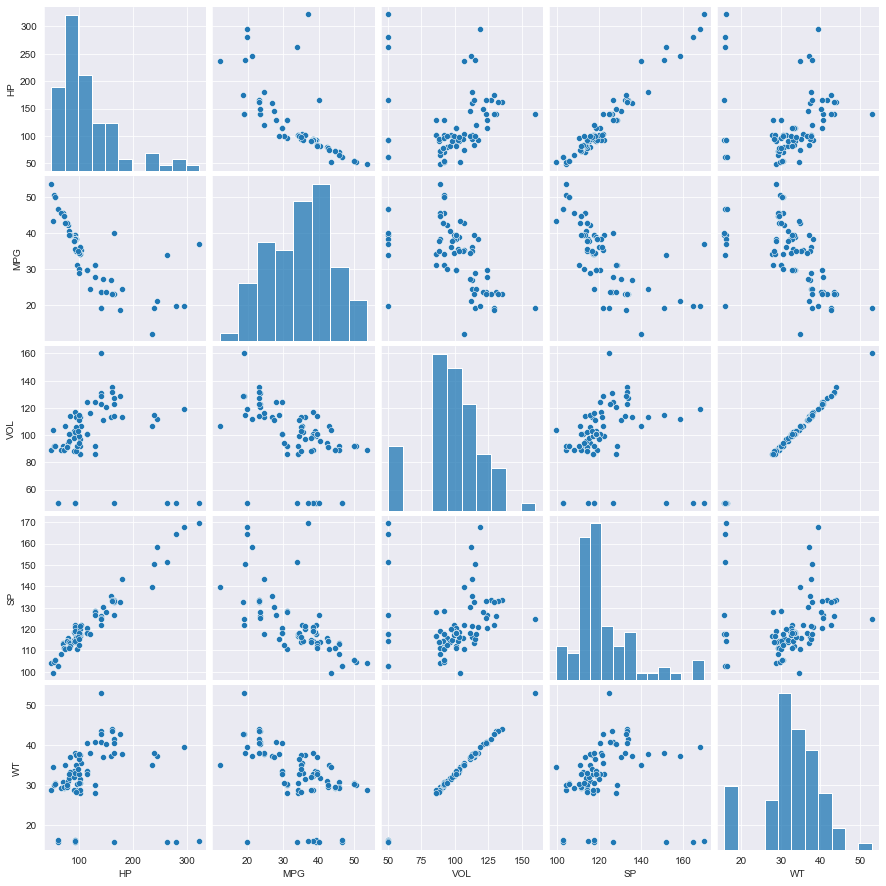

In [12]:
#plot scatterplot and backround
sns.set_style(style='darkgrid')
sns.pairplot(cars)

In [13]:
# PREPARING MODEL..................................................................................

In [14]:
#build model, ols=ordinary least square methode used
model = smf.ols('MPG~VOL+SP+WT+HP',data=cars).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     63.80
Date:                Fri, 07 May 2021   Prob (F-statistic):           1.54e-23
Time:                        15:01:12   Log-Likelihood:                -233.96
No. Observations:                  81   AIC:                             477.9
Df Residuals:                      76   BIC:                             489.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.6773     14.900      2.059      0.043       1.001      60.354
VOL           -0.3361      0.569     -0.591      0.556      -1.469       0.796
SP             0.3956      0.158      2.500      0.015       0.080       0.711
WT             0.4006      1.693      0.237      0.814      -2.972       3.773
HP            -0.2054      0.039     -5.239      0.000      -0.284      -0.127
==============================================================================
Omnibus:                       10.780   Durbin-Watson:                   1.403
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               11.722
Skew:                           0.707   Prob(JB):                      0.00285
Kurtosis:                       4.215   Cond. No.                     6.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
#coeffitiants
model.params
# y=b0+b1(x1)+b2(x2)+b3(x4)+b4(x5)
# y=30.677336(intercept to y axis)+ -0.336051(vol)+ 0.395627(sp)+ 0.400574(WT)+ -0.205444(HP)

Intercept    30.677336
VOL          -0.336051
SP            0.395627
WT            0.400574
HP           -0.205444
dtype: float64

In [16]:
#T VALUE, P VALUE

In [17]:
# t and p values
print(model.tvalues, '/n', model.pvalues)

Intercept    2.058841
VOL         -0.590970
SP           2.499880
WT           0.236541
HP          -5.238735
dtype: float64 /n Intercept    0.042936
VOL          0.556294
SP           0.014579
WT           0.813649
HP           0.000001
dtype: float64


In [18]:
# above p values which <0.05=significant,>0.05=insignificant, so "VOL,WT" both are insignificant
# insignificant= multicolinearity ; isuue

In [19]:
# R^2 VALUE

In [20]:
print(model.rsquared,model.rsquared_adj)

0.7705372737359842 0.7584602881431413


In [21]:
# by R^2 VALUE WE CAN DECIDE THE MODEL IS TO BE GOOD OR BAD
# wheather variable adding value to regression equation = yes/no , if  "populaton" variable added in this 4 variables then it shows 
# r^2 value can be slightly increased but adj r^2 would be decreased so we can conclude importance of variable 

In [22]:
# simple regression models...........................................................................................
# TO FIND OUT MULTICOLINEARITY PROBLRM

In [23]:
ml_v= smf.ols('MPG~VOL',data=cars).fit()
# tvalue,pvalue
(ml_v.tvalues,ml_v.pvalues)


(Intercept    14.106056
 VOL          -5.541400
 dtype: float64,
 Intercept    2.753815e-23
 VOL          3.822819e-07
 dtype: float64)

In [24]:
ml_w=smf.ols('MPG~WT',data = cars).fit()  
print(ml_w.tvalues, '\n', ml_w.pvalues)  

Intercept    14.248923
WT           -5.508067
dtype: float64 
 Intercept    1.550788e-23
WT           4.383467e-07
dtype: float64


In [25]:
ml_wv=smf.ols('MPG~WT+VOL',data = cars).fit()  
print(ml_wv.tvalues, '\n', ml_wv.pvalues)  

Intercept    12.545736
WT            0.489876
VOL          -0.709604
dtype: float64 
 Intercept    2.141975e-20
WT           6.255966e-01
VOL          4.800657e-01
dtype: float64


In [26]:
# CALCULATING VIF

In [27]:
rsq_hp = smf.ols('HP~WT+VOL+SP',data=cars).fit().rsquared  
vif_hp = 1/(1-rsq_hp) # 16.33

rsq_wt = smf.ols('WT~HP+VOL+SP',data=cars).fit().rsquared  
vif_wt = 1/(1-rsq_wt) # 564.98

rsq_vol = smf.ols('VOL~WT+SP+HP',data=cars).fit().rsquared  
vif_vol = 1/(1-rsq_vol) #  564.84

rsq_sp = smf.ols('SP~WT+VOL+HP',data=cars).fit().rsquared  
vif_sp = 1/(1-rsq_sp) #  16.35

# Storing vif values in a data frame
d1 = {'Variables':['Hp','WT','VOL','SP'],'VIF':[vif_hp,vif_wt,vif_vol,vif_sp]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame


,Variables,VIF
0,Hp,19.926589
1,WT,639.533818
2,VOL,638.806084
3,SP,20.007639


In [28]:
# Variance inflation factor (VIF) is used to detect the severity of multicollinearity in the ordinary least square (OLS) regression analysis.
# The VIF measures how much the variance of an estimated regression coefficient increases if your predictors are correlated.
# In the simplest case, two variables will be highly correlated, and each will have the same high VIF.

In [29]:
# RESIDUAL ANALYSIS
# VALIDATION TECHNIQUE:
# 1. Q-Q PLOT, 2.RESIDUAL FOR HOMOSCADESTICITY 3.REGRESSER*RESIDUAL

In [30]:
# A residual is the vertical distance between a data point and the regression line. ... In other words, the residual is the error that isn't explained by the regression line. The residual(e) can also be expressed with an equation. The e is the difference between the predicted value (ŷ) and the observed value.

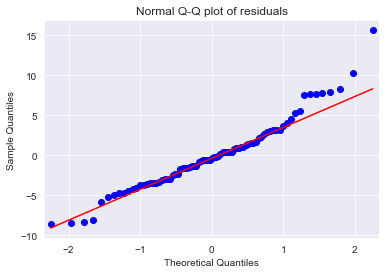

In [31]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()


In [32]:
list(np.where(model.resid>10))

[array([ 0, 76], dtype=int64)]

In [33]:
#RESIDUAL PLOT FOR HOMOSCADESTICITY..........................................

In [34]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

In [ ]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

In [36]:
# RESIDUAL REGRESSORS...........................................

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,"VOL",fig=fig)
plt.show()

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,"WT",fig=fig)
plt.show()

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,"SP",fig=fig)
plt.show()

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,"HP",fig=fig)
plt.show()

In [41]:
#MODEL DELITION DIAGNOSTIC...................................................

#DECTING INFLUENCER/OUTLIER


In [42]:
# COOK'S DISTANCE............................................................

In [43]:
model_influence = model.get_influence()
(c,_)=model_influence.cooks_distance

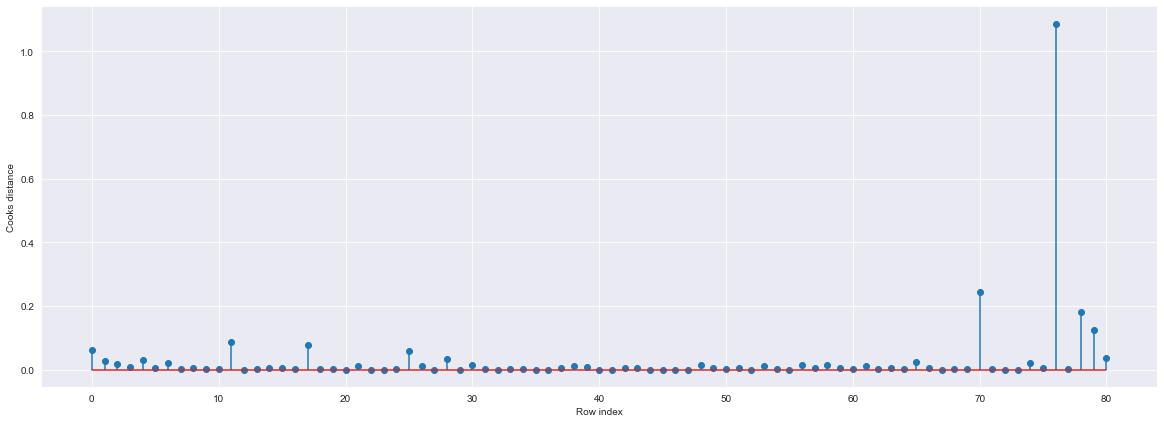

In [44]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(cars)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks distance')
plt.show()

In [45]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(76, 1.086519399817969)

In [46]:
#HIGH INFLUENCE POINTS

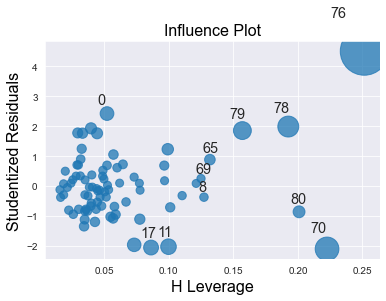

In [47]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [48]:
k = cars.shape[1]
n = cars.shape[0]
leverage_cutoff = 3*((k+1)/n)

In [49]:
#from above dia 70,76 are influencing points

In [50]:
cars[cars.index.isin([70,76])]

,HP,MPG,VOL,SP,WT
70,280,19.678507,50,164.598513,15.823060
76,322,36.900000,50,169.598513,16.132947


In [51]:
#See the differences in HP and other variable values, COMPARE [66]&[67]
cars.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [52]:
# IMPROVING MODEL.................................................................

In [53]:
#Load the data
cars_new = pd.read_csv("D:/DATA SCIENCE/1. Data Scientist/Day 14-Multi Linear Regression  Material/Cars.csv")

In [54]:
#Discard the data points which are influencers and reasign the row number (reset_index())
car1 = cars_new.drop(cars_new.index[[70,76]],axis=0).reset_index()

In [55]:
#Drop the original index
car1=car1.drop(['index'],axis=1)

In [56]:
car1

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
74,175,18.762837,129,132.864163,42.778219
75,238,19.197888,115,150.576579,37.923113
76,263,34.000000,50,151.598513,15.769625
77,295,19.833733,119,167.944460,39.423099


In [57]:
# BUILD MODEL.............................................................................

In [58]:
#Exclude variable "WT" and generate R-Squared and AIC values
final_ml_V= smf.ols('MPG~VOL+SP+HP',data = car1).fit()

In [59]:
(final_ml_V.rsquared,final_ml_V.aic)

(0.8161692010376007, 446.11722639447726)

In [60]:
#Exclude variable "VOL" and generate R-Squared and AIC values
final_ml_W= smf.ols('MPG~WT+SP+HP',data = car1).fit()

In [61]:
(final_ml_W.rsquared,final_ml_W.aic)

(0.8160034320495306, 446.1884323575031)

In [62]:
# Comparing above R-Square and AIC values, model 'final_ml_V' has high R- square and low AIC value hence include variable 'VOL' so that multi collinearity problem would be resolved.

In [63]:
# COOK'S DISTANCE..........................................

In [64]:
model_influence_V = final_ml_V.get_influence()
(c_V, _) = model_influence_V.cooks_distance

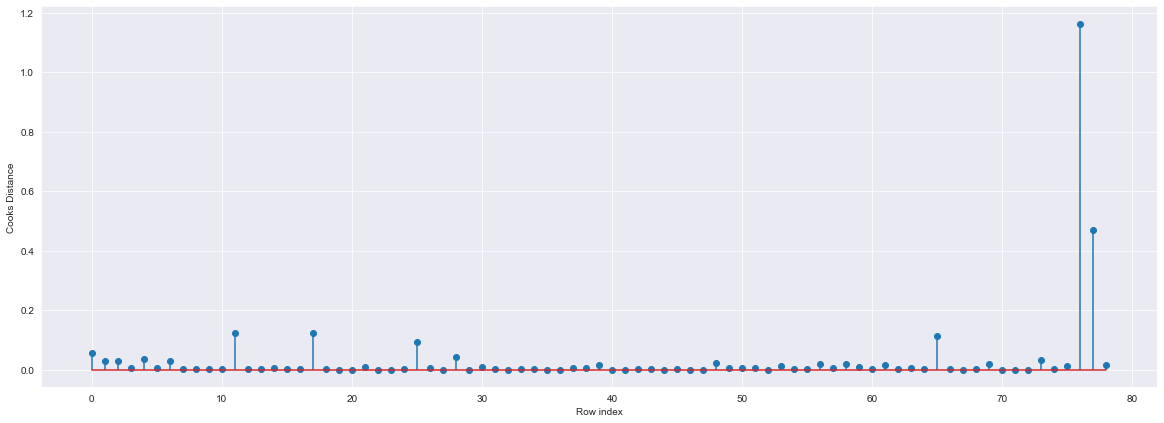

In [65]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(car1)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [66]:
#index of the data points where c is more than .5
(np.argmax(c_V),np.max(c_V))

(76, 1.1629387469135057)

In [67]:
#Drop 76 and 77 observations
car2=car1.drop(car1.index[[76,77]],axis=0)

In [68]:
car2

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
72,140,19.086341,160,124.715241,52.997752
73,140,19.086341,129,121.864163,42.618698
74,175,18.762837,129,132.864163,42.778219
75,238,19.197888,115,150.576579,37.923113


In [69]:
#Reset the index and re arrange the row values
car3=car2.reset_index()

In [70]:
car4=car3.drop(['index'],axis=1)

In [71]:
car4

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
72,140,19.086341,160,124.715241,52.997752
73,140,19.086341,129,121.864163,42.618698
74,175,18.762837,129,132.864163,42.778219
75,238,19.197888,115,150.576579,37.923113


In [72]:
#Build the model on the new data
final_ml_V= smf.ols('MPG~VOL+SP+HP',data = car4).fit()

In [73]:
#Again check for influencers
model_influence_V = final_ml_V.get_influence()
(c_V, _) = model_influence_V.cooks_distance

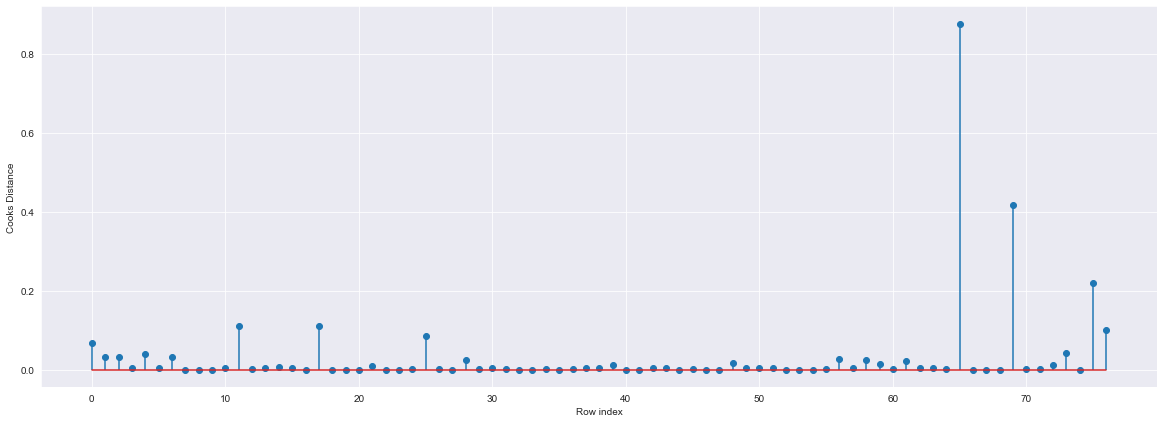

In [74]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(car4)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [75]:
#index of the data points where c is more than .5
(np.argmax(c_V),np.max(c_V))

(65, 0.8774556986296621)

In [76]:
# Since the value is <1 , we can stop the diagnostic process and finalize the model

In [77]:
#Check the accuracy of the mode
final_ml_V= smf.ols('MPG~VOL+SP+HP',data = car4).fit()

In [78]:
(final_ml_V.rsquared,final_ml_V.aic)

(0.8669636111859063, 409.4153062719508)

In [80]:
# BY COMPARING [28]&[93] WE INCREASED VALUE IN 93

In [ ]:
# PREDICTING FOR NEW DATA

In [81]:
#New data for prediction
new_data=pd.DataFrame({'HP':40,"VOL":95,"SP":102,"WT":35},index=[1])

In [82]:
final_ml_V.predict(new_data)

1    46.035594
dtype: float64

In [83]:
final_ml_V.predict(cars_new.iloc[0:5,])

0    45.428872
1    43.992392
2    43.992392
3    43.508150
4    44.085858
dtype: float64

In [84]:
pred_y = final_ml_V.predict(cars_new)

In [85]:
pred_y

0     45.428872
1     43.992392
2     43.992392
3     43.508150
4     44.085858
        ...    
76     7.165876
77    12.198598
78    14.908588
79     4.163958
80     9.161202
Length: 81, dtype: float64